In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
buy = pd.read_csv('buy.csv', delimiter=';', header=None)
buy.columns = ['date','action','user_id','amount']
buy['date'] = pd.to_datetime(buy['date']).dt.date

In [21]:
buy

,date,action,user_id,amount
0,2018-01-01,buy,2458151555,8
1,2018-01-01,buy,2458151933,8
2,2018-01-01,buy,2458152245,8
3,2018-01-01,buy,2458152315,8
4,2018-01-01,buy,2458152371,8
...,...,...,...,...
8402,2018-03-30,buy,2458330984,80
8403,2018-03-30,buy,2458180092,8
8404,2018-03-30,buy,2458331539,80
8405,2018-03-30,buy,2458339835,80


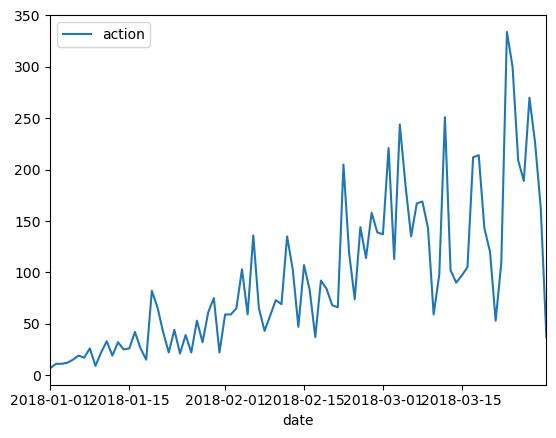

In [22]:
buy.groupby('date').count()[['action']].plot()

In [25]:
buyers = buy.groupby('date').count()[['action']]

In [26]:
okform = buyers.reset_index(drop = True).action

In [27]:
okform.tail

<bound method NDFrame.tail of 0       7
1      11
2      11
3      12
4      15
     ... 
84    189
85    270
86    226
87    163
88     37
Name: action, Length: 89, dtype: int64>

In [28]:
x = okform.index
y = okform.values

In [33]:
coefs = np.polyfit(x, y, 1)
predict = np.poly1d(coefs)

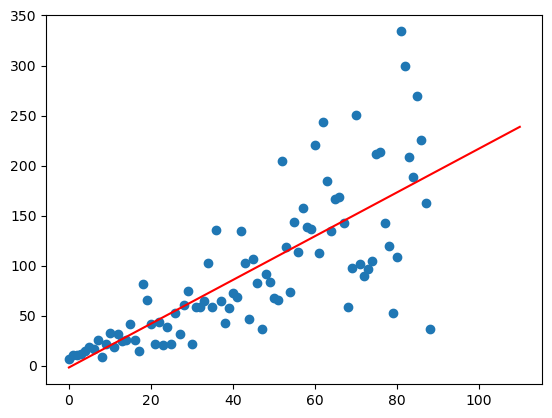

In [34]:
x_test = np.linspace(0, 110)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [35]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.5823487611483158

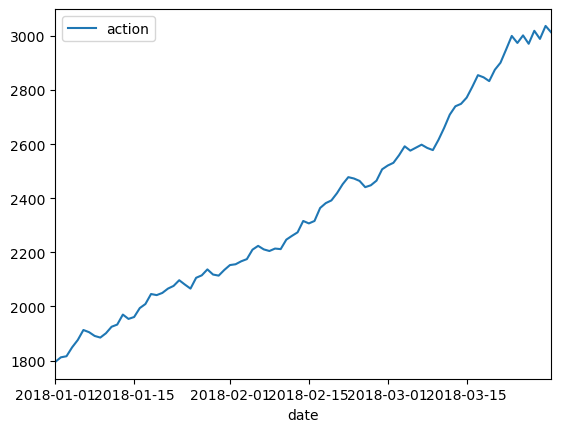

In [124]:
viz.plot()